**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!

Поэтому он просит нас модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:

Средний удой за год — не менее 6000 килограммов,
Молоко должно быть вкусным.


## Загрузка данных

In [838]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_absolute_error, 
    mean_squared_error
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [839]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal = ',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')

info_list = {'Ferma main': ferma_main,
               'Ferma dad': ferma_dad,
               'Cow buy': cow_buy,}

##  Предобработка данных

In [840]:
cow_buy = cow_buy.rename(columns={"порода папы_быка": "Порода папы быка",
                        "Имя_папы": "Имя Папы",
                        "Текущая_жирность,%": "Жирность,%",
                        "Текущий_уровень_белок,%": "Белок,%"})

ferma_main = ferma_main.rename(columns={'порода папы_быка':'Порода папы быка'})

In [841]:
ferma_main.shape

(634, 12)

<div class="alert alert-info">
Согласен
</div>

In [842]:
ferma_main.isna()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
629,False,False,False,False,False,False,False,False,False,False,False,False
630,False,False,False,False,False,False,False,False,False,False,False,False
631,False,False,False,False,False,False,False,False,False,False,False,False
632,False,False,False,False,False,False,False,False,False,False,False,False


In [843]:
#инфа по всем таблицм
for info in info_list:
    info_list[info].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [844]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   Порода папы быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [845]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   Порода папы быка  20 non-null     object 
 3   Имя Папы          20 non-null     object 
 4   Жирность,%        20 non-null     float64
 5   Белок,%           20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [846]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   Порода папы быка  20 non-null     object 
 3   Имя Папы          20 non-null     object 
 4   Жирность,%        20 non-null     float64
 5   Белок,%           20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [847]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   Порода папы быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [848]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [849]:
cow_buy.head(10)

,Порода,Тип пастбища,Порода папы быка,Имя Папы,"Жирность,%","Белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079


In [850]:
cow_buy.isna().sum()

Порода              0
Тип пастбища        0
Порода папы быка    0
Имя Папы            0
Жирность,%          0
Белок,%             0
dtype: int64

In [851]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [852]:
ferma_main.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
Порода папы быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [853]:
cow_buy.duplicated().sum()

4

In [854]:
cow_buy.drop_duplicates(inplace=True)

In [855]:
ferma_main.duplicated().sum()

5

In [856]:
ferma_main.drop_duplicates(inplace=True)

In [857]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [858]:
ferma_main['Возраст'].value_counts()

более_2_лет    519
менее_2_лет    110
Name: Возраст, dtype: int64

In [859]:
ferma_main['Удой, кг'].mean()

6188.75039745628

In [860]:
ferma_main['Жирность,%'].mean()

3.6036565977742447

In [861]:
cow_buy.head(10)

,Порода,Тип пастбища,Порода папы быка,Имя Папы,"Жирность,%","Белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073


In [862]:
ferma_main  = ferma_main.rename(columns={'порода папы_быка':'Порода папы быка'})

In [863]:
cow_buy.head()

,Порода,Тип пастбища,Порода папы быка,Имя Папы,"Жирность,%","Белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


In [864]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [865]:
columns = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст'] #качественные признаки 


In [866]:
for i in columns:
    unique_values = ferma_main[i].unique()
    print(f'Уникальные значения в колонке {i}: {unique_values}')

Уникальные значения в колонке Порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в колонке Тип пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в колонке Порода папы быка: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в колонке Вкус молока: ['вкусно' 'не вкусно']
Уникальные значения в колонке Возраст: ['более_2_лет' 'менее_2_лет']


Видны неявные дублиты

In [867]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace(['Равнинное', 'Равнинные'], 'Равнинное')
ferma_main['Порода папы быка'] = ferma_main['Порода папы быка'].replace(['Айдиалл', 'Айдиал'], 'Айдиал')
ferma_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']] = ferma_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']].replace(',', '.', regex=True).astype('float')

In [868]:
# для каждой колонки выводим уникальные значения
for column in columns:
    unique_values = ferma_main[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')

Уникальные значения в колонке Порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в колонке Тип пастбища: ['Равнинное' 'Холмистое']
Уникальные значения в колонке Порода папы быка: ['Айдиал' 'Соверин']
Уникальные значения в колонке Вкус молока: ['вкусно' 'не вкусно']
Уникальные значения в колонке Возраст: ['более_2_лет' 'менее_2_лет']


**Промежуточный вывод по данным:**

Убрал дубликаты (явные и неявные)

Вывел уникальные значения для признака

Среднее значение удоя - 6125.9

Возраст коров в подавляющем большинтсве - более 2 лет (518 к 110)

Заменил названия некоторых колонок

## Исследовательский анализ данных

Проведение статистического анализа всех признаков.

In [869]:
ferma_main.describe()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [870]:
#транспонируем для удобства 
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
"Удой, кг",629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
СПО (Сахаро-протеиновое соотношение),629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
"Жирность,%",629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
"Белок,%",629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


In [871]:
ferma_main['Удой, кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: Удой, кг, dtype: float64

In [872]:
ferma_main.query('`Удой, кг` >= 8000').count()

id                                       1
Удой, кг                                 1
ЭКЕ (Энергетическая кормовая единица)    1
Сырой протеин, г                         1
СПО (Сахаро-протеиновое соотношение)     1
Порода                                   1
Тип пастбища                             1
Порода папы быка                         1
Жирность,%                               1
Белок,%                                  1
Вкус молока                              1
Возраст                                  1
dtype: int64

Больше 8000 кг всего у одной коровы - выброс. Убираем

In [873]:
ferma_main = ferma_main.query('`Удой, кг` <= 8000')

Больше 8000 кг всего у одной коровы - выброс

In [874]:
# функция для постоения гистограмм
def histograms(data, column, bins=50):
    
    sns.histplot(data=data, x=column, kde=True, bins=bins, color='purple')
    plt.title(column, fontsize=15)
    plt.xlabel(column, fontsize=15)
    
    plt.show()

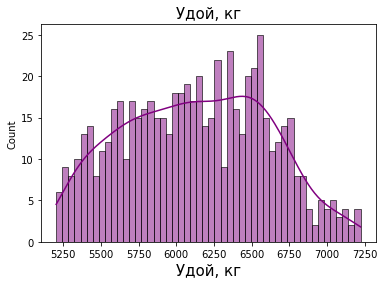

In [875]:
histograms(ferma_main, 'Удой, кг')

In [876]:
ferma_main['Удой, кг'].mean()

6125.968152866242

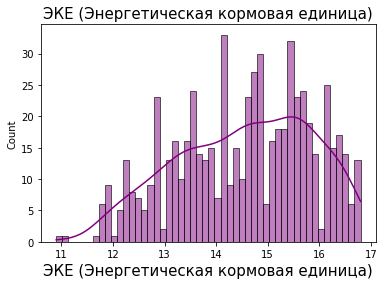

In [877]:
histograms(ferma_main, 'ЭКЕ (Энергетическая кормовая единица)')

In [878]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'].mean()

14.548726114649678

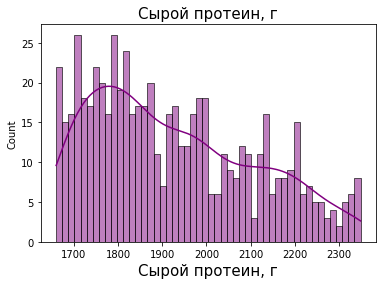

In [879]:
histograms(ferma_main, 'Сырой протеин, г')

In [880]:
ferma_main['Сырой протеин, г'].mean()

1923.7595541401274

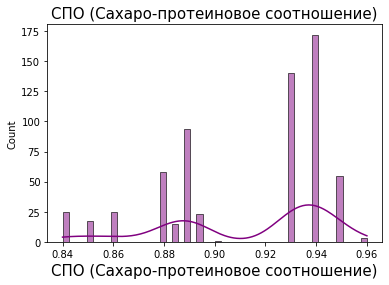

In [881]:
histograms(ferma_main, 'СПО (Сахаро-протеиновое соотношение)')

In [882]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'].mean()

0.9130891719745222

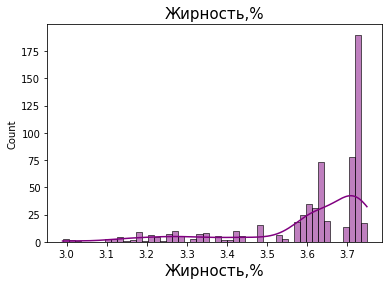

In [883]:
histograms(ferma_main, 'Жирность,%')

In [884]:
ferma_main['Жирность,%'].mean()

3.604267515923566

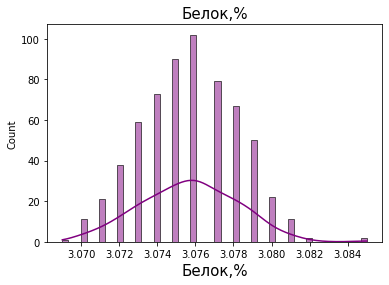

In [885]:
histograms(ferma_main, 'Белок,%')

In [886]:
ferma_main['Белок,%'].mean()

3.0756703821656055

**Выводы по графикам:**

Выбросы не замечены

Так как выявил единсвтенный выброс в графе Удой удалил его ранее и на графике его уже нет 

Среднее значение ЭКЕ (Энергетическая кормовая единица) - 14.5

Среднее значение Сырой протеин, г - 1923, виден тренд к снижению

Среднее значение Жирность,% - 3.6, видим равномерный рост до 3.5 процентов, а далее резкий рост до 3.7

Среднее значение Белок,% - 3.07



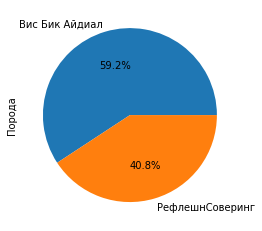

In [887]:
ferma_main['Порода'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

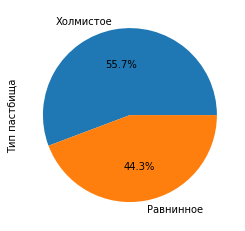

In [888]:
ferma_main['Тип пастбища'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

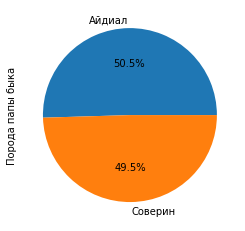

In [889]:
ferma_main['Порода папы быка'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

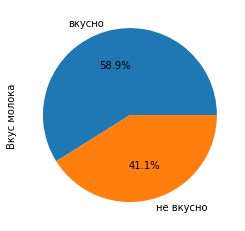

In [890]:
ferma_main['Вкус молока'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

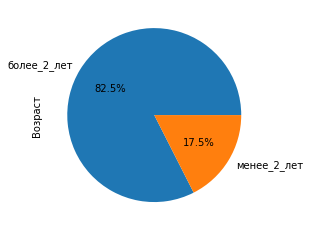

In [891]:
ferma_main['Возраст'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

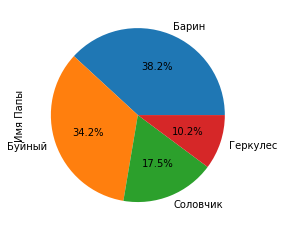

In [892]:
ferma_dad['Имя Папы'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

**Промежуточный вывод:**

Выполнен статистический анализ
Построены разные графики для признаков. 

Основные наблюдения: чаще всего встречается старше 2 лет, порода Вис Бик Айдиал больше, пасутся на холмистой местности, а также целевой признак "Вкус молока" чаще положительный чем нет 59 и 41 процент соответственно

## Корреляционный анализ

Взаимосвязь между целевым и входными признаками. Целеой признак - Удой.

In [893]:
def shapiro_test(data):
    statistic, p_value = shapiro(data)

    # Печать результата теста
    alpha = 0.05  # Уровень значимости
    print('Результат теста Шапиро:')
    print(f'Статистика теста: {statistic}')
    print(f'p-значение: {p_value}')
    if p_value > alpha:
        print('Распределение данных является нормальным.')
    else:
        print('Данные распределены ненормально')
    

In [894]:
shapiro_test(ferma_main['Удой, кг'])

Результат теста Шапиро:
Статистика теста: 0.981349527835846
p-значение: 3.540204147611803e-07
Данные распределены ненормально


Поскольку распределение не является нормальным - для подсчета корреляции применим метод Спирмана.

In [895]:
columns_for_correlation = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
'Жирность,%', 'Белок,%']

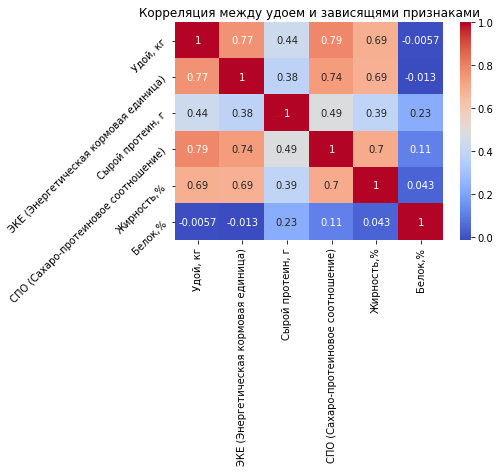

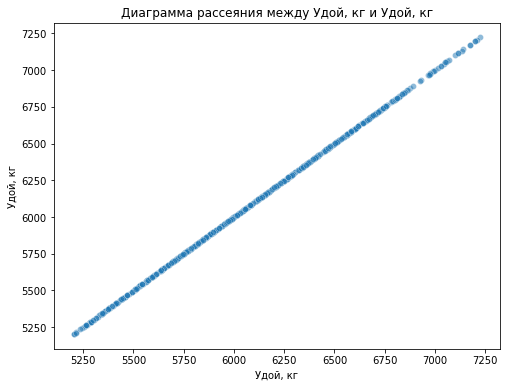

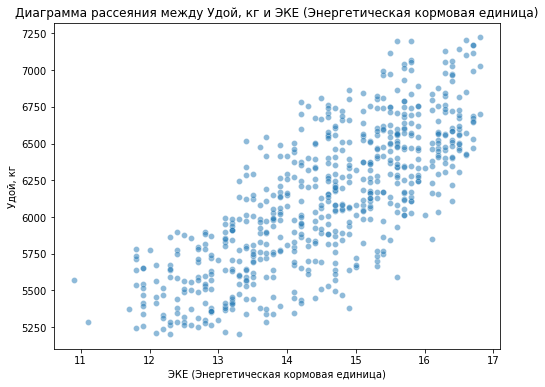

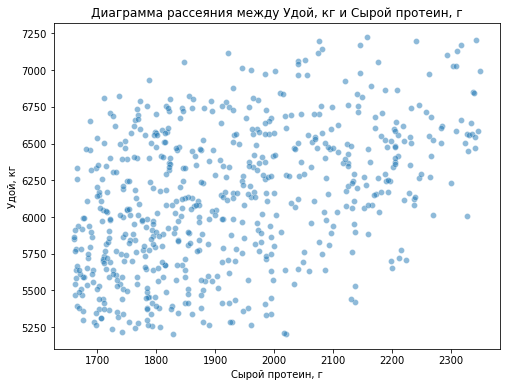

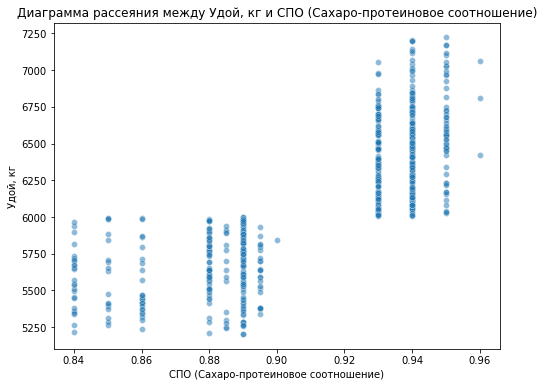

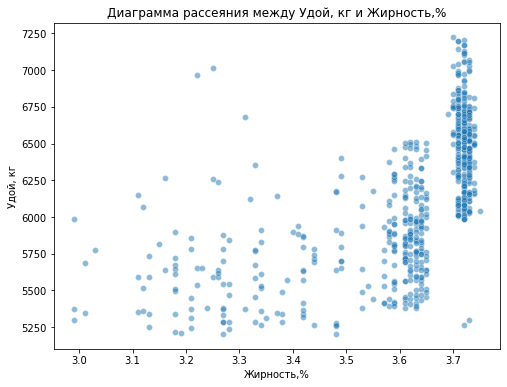

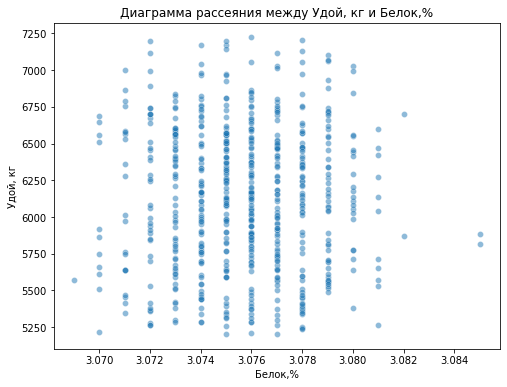

In [896]:
def calculate_correlation(data, target_feature, columns_for_correlation, method='spearman'):

    matrix_of_correlation = data[[target_feature] + columns_for_correlation].corr(method=method)
    
    sns.heatmap(matrix_of_correlation, annot=True, cmap='coolwarm')
    plt.yticks(rotation=45)
    plt.title(f'Корреляция между удоем и зависящями признаками')
    plt.show()
    
    for column in matrix_of_correlation:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x=column, y=target_feature, alpha=0.5)
        plt.title(f'Диаграмма рассеяния между {target_feature} и {column}')
        plt.xlabel(column)
        plt.ylabel(target_feature)
        plt.show()

calculate_correlation(ferma_main, 'Удой, кг', columns_for_correlation, method='spearman')

## Обучение модели линейной регрессии

Целевого признак нашей модели - Удой (то, что хотим спрогнозировать).

Рукодствуясь здравым смыслом выбираем признаки, которые подойдут для нашей задачи (прогноз удоя).

Параметры, которые следует использовать:

Параметры корма коровы - (ЭКЕ (Энергетическая кормовая единица), cырой протеин, СПО (Сахаро-протеиновое соотношение), 

Где паслась корова - Тип пастбища

Особенности коровы - Порода, возраст, имя папы

Характеристики молока не влияют на удой

In [897]:
def models_for_train(data, columns_to_drop, feature, cat_col_names, num_col_names, random_state):
    
    RANDOM_STATE = 42
    
    X = data.drop(columns_to_drop, axis=1)
    y = data[feature]
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE) 
    
    # выбор метода кодирования, его инициализация
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    # кодирование обеих выборок
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    # список новых признаков
    encoder_col_names = encoder.get_feature_names()
    print(encoder_col_names)

    # выбор метода масштабирования
    scaler = StandardScaler()
    # масштабирование обеих выборок
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    # датафрейм из закодированных данных
    # названия столбцов из переменной encoder_col_names
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    # создаём датафрейм из закодированных данных
    # передаём названия столбцов из переменной encoder_col_names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # объединяем все преобразованные данные в тренировочный и тестовый датафреймы
    # сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    
    # инициализация и обучение модели
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    # предсказанные значения для X_test
    predictions = model_lr.predict(X_test)
    
    # рассчитайте остатки
    residuals =  y_test - predictions

    return model_lr, encoder, scaler, y_test, predictions, residuals

In [898]:
# фунция для графиков по остатками модели

def graphs_for_residuals(predictions, residuals):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=20)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

In [899]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id']

cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка']

num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']

model_lr, encoder, scaler, y_test, predictions, residuals = models_for_train(ferma_main, columns_to_drop, 'Удой, кг', 
                                   cat_col_names, num_col_names, 42)

['x0_менее_2_лет' 'x1_РефлешнСоверинг' 'x2_Холмистое' 'x3_Соверин']


In [900]:
# рассчитайт значения R2 для линейной регрессии
r2_lr = r2_score(y_test, predictions)
print("R2 LinearRegression =", r2_lr)

R2 LinearRegression = 0.7844078173416966


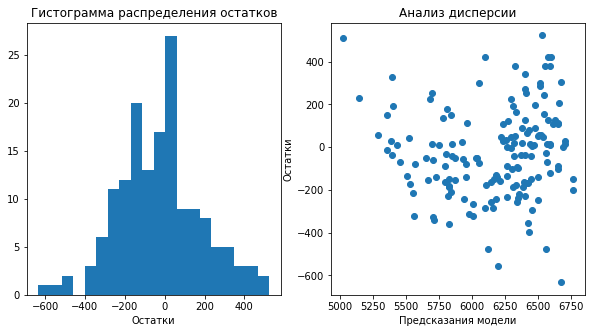

In [901]:
graphs_for_residuals(predictions, residuals)

**R2 - коэффициент детерминации.**

Коэффициент детерминации R² лежит в диапазоне от минус бесконечности до единицы. Модель работает точно, если ошибка равна нулю:  

R**2 = 1−0 = 1. Если же ошибка в числителе дроби будет намного больше дисперсии, сама дробь будет значительно больше единицы, а коэффициент детерминации примет отрицательное значение. Такая модель настолько неэффективна, что среднее значение оказывается ближе к истинному, чем предсказанное. 

Коэффициент детерминации оценивает обобщающую способность модели. Это значит, что он определяет, насколько хорошо модель «объясняет», предсказывает целевой признак по входным. Положительные значения R² показывают, в скольких процентах случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Отрицательный R² означает, что средние значения всегда лучше прогнозных.

Единица — это его максимальное значение, которое говорит о том, что модель не ошибается.

Коэффициент детерминации R² отличается от изученных ранее метрик: он позволяет сравнивать модели с разными масштабами целевого признака.

*Что означает результат этой метрики - в скольких процентах случаев предсказание модели точнее, чем среднее значение целевого признака.*


**Анализ остатков**

Остатки модели не только показывают разницу между предсказанным и истинным значениями. Они также отражают закономерности, которые позволяют судить о качестве модели.

Остатки модели тоже характеризуют качество, но с другой стороны. Анализ остатков проверяет не решения модели, а то, насколько хорошо она замечает взаимосвязи между признаками.

*Основное правило анализа остатков: если модель правильно подобрана к исходным данным, то в остатках не должно остаться никаких закономерностей. Систематические паттерны в остатках означают, что модель не учитывает какие-то входные признаки, которые влияют на целевой.*

**В остатках закономерностей не выявлено**

**Модель линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.**

Из диаграмма рассеяния выше мы можем увидеть четкую гранцицу: до 0.91 и после 0.91

Графики показывают, что СПО и Удой связаны нелинейно. Исключаем нелинейность переводом СПО в категориальный признак, выявив и использовав границу нелинейности.

ЭКЕ и Удой также связаны нелинейно. Исключим нелинейность: введем новуй признак «ЭКЕ в квадрате».

In [902]:
threshold = 0.91
ferma_main['СПО'] = (ferma_main['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: '<=_0.91' if x <= threshold else '>_0.91'))
ferma_main['ЭКЕ в квадрате'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'] ** 2

ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО,ЭКЕ в квадрате
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,<=_0.91,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,<=_0.91,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,<=_0.91,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,<=_0.91,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,<=_0.91,163.84


In [903]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id', 'СПО (Сахаро-протеиновое соотношение)']

cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 'СПО']

num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']

model_lr_2, encoder2, scaler2, y_test2, predictions2, residuals2 = models_for_train(ferma_main, columns_to_drop, 
                                                    'Удой, кг', cat_col_names,
                                                      num_col_names, 42)

['x0_менее_2_лет' 'x1_РефлешнСоверинг' 'x2_Холмистое' 'x3_Соверин'
 'x4_>_0.91']


In [904]:
r2_lr2 = r2_score(y_test2, predictions2)
print("R2 LinearRegression =", r2_lr2)

R2 LinearRegression = 0.8180879926867503


Модель стала лучше

Эта модель объясняет около 81.8% дисперсии в данных, что говорит о хорошем соответствии модели данным.

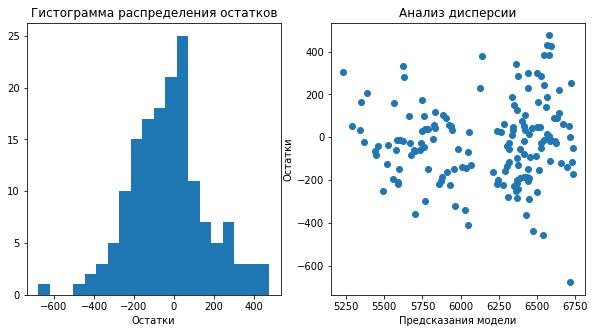

In [905]:
graphs_for_residuals(predictions2, residuals2)

По анализу остатков тоже стало лучше.

Не понимаю можно ли считать значение -600 выбросом или нет

In [906]:
full_data = pd.merge(ferma_main, ferma_dad, on='id')

full_data.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО,ЭКЕ в квадрате,Имя Папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,<=_0.91,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,<=_0.91,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,<=_0.91,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,<=_0.91,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,<=_0.91,163.84,Барин


In [907]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id', 'СПО (Сахаро-протеиновое соотношение)']

cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 'СПО', 'Имя Папы']

num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']

model_lr3, encoder3, scaler3, y_test3, predictions3, residuals3 = models_for_train(full_data, columns_to_drop, 
                                                    'Удой, кг', cat_col_names, 
                                                    num_col_names, 42)

['x0_менее_2_лет' 'x1_РефлешнСоверинг' 'x2_Холмистое' 'x3_Соверин'
 'x4_>_0.91' 'x5_Буйный' 'x5_Геркулес' 'x5_Соловчик']


In [908]:
r2_lr3 = r2_score(y_test3, predictions3)
print("R2 LinearRegression =", r2_lr3)

R2 LinearRegression = 0.8247542745210403


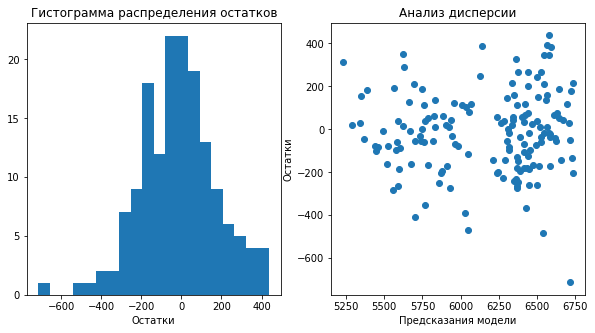

In [909]:
residuals3 =  y_test3 - predictions3
graphs_for_residuals(predictions2, residuals3)

In [910]:
#функция для подсчета метрик
def metrics(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    return mse, mae, rmse

In [911]:
print(metrics(y_test, predictions))
print(metrics(y_test2, predictions2))
print(metrics(y_test3, predictions3))

(43887.015009660514, 164.2419446347493, 209.4922791170608)
(37030.91131113693, 149.03965222364602, 192.43417396901447)
(35673.88988618199, 146.16302445362328, 188.87532895055932)


По результам подсчета метрик третья модель наилучшая (меньшее значение каждой из метрик)

Метрика MAE — это средняя абсолютная ошибка. Она рассчитывается как среднее от суммы всех ошибок модели по модулю. Это отличает её от MSE/RMSE, где разница между истинным значением и прогнозом возводится в квадрат. MAE измеряет ошибку в единицах целевого признака.

MSE - метрика, которая сообщает нам среднеквадратичную разницу между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже MSE, тем лучше модель соответствует набору данных.

RMSE - метрика, которая сообщает нам квадратный корень из средней квадратичной разницы между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже RMSE, тем лучше модель соответствует набору данных.

В третьей модели лучшие цифры по всем метрикам следовательноа она и считается лучшей

**Файл cow_buy.csv — это данные о коровах «ЭкоФермы»**, которых фермер хочет изучить перед покупкой. 

Структура таблицы почти аналогична ferma_main.csv, кроме нескольких особенностей:

Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют. 

Недавно технологи заказчика пересмотрели параметры корма и планируют их внедрить после расширения стада. Именно новые параметры нужно использовать, когда вы будете применять предсказательные модели к бурёнкам «ЭкоФермы». 

По новой схеме фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%.

In [912]:
cow_buy.head()

,Порода,Тип пастбища,Порода папы быка,Имя Папы,"Жирность,%","Белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


In [913]:
data_aggregated = (ferma_main.groupby(['Тип пастбища', 'Порода'])
.agg({'СПО (Сахаро-протеиновое соотношение)':'mean', 'ЭКЕ (Энергетическая кормовая единица)' :'mean', 'Сырой протеин, г':'mean'})
.reset_index())

In [914]:
cow_buy['Тип пастбища'] = cow_buy['Тип пастбища'].str.capitalize()

In [915]:
cow_buy = cow_buy.merge(data_aggregated, on=['Тип пастбища', 'Порода'], how='left')

In [916]:
cow_buy.head(5)

,Порода,Тип пастбища,Порода папы быка,Имя Папы,"Жирность,%","Белок,%",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г"
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0.913595,14.562162,1941.702703
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0.909305,14.328342,1903.743316
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0.914176,14.564835,1921.087912
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0.916212,14.774545,1927.800000
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0.914176,14.564835,1921.087912


In [917]:
list_of_categories  = ['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г']

for i in list_of_categories:
    cow_buy[i] = cow_buy[i].multiply(1.05)

In [918]:
threshold = 0.91

cow_buy['СПО'] = (cow_buy['СПО (Сахаро-протеиновое соотношение)']
                                    .apply(lambda x: '<=_0.91' if x <= threshold else '>_0.91'))
cow_buy['ЭКЕ в квадрате'] = cow_buy['ЭКЕ (Энергетическая кормовая единица)'] ** 2

cow_buy.head()

,Порода,Тип пастбища,Порода папы быка,Имя Папы,"Жирность,%","Белок,%",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО,ЭКЕ в квадрате
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0.959274,15.290270,2038.787838,>_0.91,233.792365
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0.954770,15.044759,1998.930481,>_0.91,226.344784
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0.962023,15.513273,2024.190000,>_0.91,240.661631
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202


In [919]:
cow_buy['Возраст'] = 'менее_2_лет'
cow_buy.head()

,Порода,Тип пастбища,Порода папы быка,Имя Папы,"Жирность,%","Белок,%",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО,ЭКЕ в квадрате,Возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,0.959274,15.290270,2038.787838,>_0.91,233.792365,менее_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,0.954770,15.044759,1998.930481,>_0.91,226.344784,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202,менее_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,0.962023,15.513273,2024.190000,>_0.91,240.661631,менее_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,0.959885,15.293077,2017.142308,>_0.91,233.878202,менее_2_лет


In [920]:
new_order = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода', 'Тип пастбища', 'Порода папы быка', 'Жирность,%', 'Белок,%', 'Возраст', 'СПО', 'ЭКЕ в квадрате', 'Имя Папы']
cow_buy = cow_buy.reindex(columns=new_order)
cow_buy.head()
cow_buy_copy = cow_buy.copy()

In [921]:
columns_to_drop = ['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг', 'id', 'СПО (Сахаро-протеиновое соотношение)']

cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 'СПО', 'Имя Папы']

num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']

encoder = encoder3 
cow_buy_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder3.get_feature_names()
scaler = scaler3 
cow_buy_scaled = scaler.fit_transform(cow_buy[num_col_names])
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)
cow_buy = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)
predictions = model_lr3.predict(cow_buy)

In [922]:
cow_buy_copy["Удой (prediction)"] = predictions
cow_buy_copy.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Возраст,СПО,ЭКЕ в квадрате,Имя Папы,Удой (prediction)
0,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,менее_2_лет,>_0.91,233.792365,Геркулес,6368.490286
1,15.044759,1998.930481,0.954770,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,>_0.91,226.344784,Буйный,5906.029745
2,15.293077,2017.142308,0.959885,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,менее_2_лет,>_0.91,233.878202,Барин,5965.316286
3,15.513273,2024.190000,0.962023,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,менее_2_лет,>_0.91,240.661631,Буйный,6551.704658
4,15.293077,2017.142308,0.959885,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,менее_2_лет,>_0.91,233.878202,Буйный,6223.462577


**Доверительный интервал**

In [923]:
print(st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))
print(st.norm.interval(confidence=0.95, loc=np.mean(predictions2), scale=st.sem(predictions2)))
print(st.norm.interval(confidence=0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

(6104.401815588984, 6330.829570795771)
(6103.09954488274, 6228.958153299152)
(6092.340075854289, 6221.375070058381)


**Логистическая регрессия**

In [924]:
def flavor(i):
    value = 1 if i['Вкус молока'] == 'вкусно' else 0
    return value

full_data['Вкусное молоко'] = full_data.apply(flavor, axis = 1)    
    
full_data.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО,ЭКЕ в квадрате,Имя Папы,Вкусное молоко
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,<=_0.91,201.64,Буйный,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,<=_0.91,163.84,Соловчик,1
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,<=_0.91,196.00,Барин,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,<=_0.91,153.76,Буйный,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,<=_0.91,163.84,Барин,1


In [925]:
columns_to_drop = ['Вкус молока', 'Удой, кг', 'id', 'СПО (Сахаро-протеиновое соотношение)', 'Вкусное молоко']

cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 'СПО', 'Имя Папы']

num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г', 'Жирность,%', 'Белок,%']

In [926]:
RANDOM_STATE = 42
X = full_data.drop(columns_to_drop, axis=1)
y = full_data['Вкусное молоко']
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE) 

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

Accuracy: 0.6305732484076433
Recall: 0.8636363636363636
Precision: 0.6229508196721312


Text(33.0, 0.5, 'True Label')

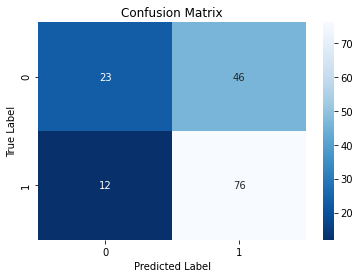

In [927]:
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
matrix_of_confusion = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

sns.heatmap(matrix_of_confusion, annot=True, fmt='d', cmap='Blues_r')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Accuracy - 0.63, что означает, что модель правильно классифицирует примерно 63% образцов. Accuracy оценивает только общую точность модели, но этого бывает мало. Иногда важнее найти, какой класс модель предсказывает хуже, чем другой

Precision - 0.62, что означает, что около 62% предсказанных моделью положительных случаев действительно являются истинными положительными случаями. Эта метрика показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Иными словами, precision определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0.

Recall - 0.86, что указывает на то, что модель способна обнаруживать примерно 86% положительных случаев из всех истинных положительных случаев. Метрика, обратная precision — recall. На русском языке её называют полнотой. Она измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Предсказания False Negative рассматриваются метрикой как «неучтённые» True Positive. Чем выше recall, тем больше прогнозов Positive модель смогла дать верно. 

Матрица ошибок (confusion matrix) для логистической регрессии представляет собой таблицу, которая показывает количество верно и неверно классифицированных примеров каждого класса в задаче классификации.

Матрица ошибок — это инструмент для анализа и сравнения моделей. В отличие от метрики accuracy, он позволяет определить, как ошибается модель, что именно она предсказывает верно и неверно.

Верно классифицированные положительные примеры (True Positives, TP): 76 Неверно классифицированные отрицательные примеры (False Negatives, FN): 12 Неверно классифицированные положительные примеры (False Positives, FP): 46 Верно классифицированные отрицательные примеры (True Negatives, TN): 23



<div class="alert alert-info">
Сделал, подсчет интервала выше
</div>

In [928]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num=12,endpoint=False)]

columns = ['y_pred_' + str(i) for i in thresholds]
data = pd.DataFrame(columns=['y_valid', 'y_proba'] + columns)

y_proba = clf.predict_proba(X_test)[:,1]

data['y_valid'] = y_test
data['y_proba'] = y_proba

for i, j in enumerate(columns):
    threshold = thresholds[i]
    data[j] = data['y_proba'].apply(lambda x: 1 if x >= threshold else 0)
    print('Порог = ', threshold, '; Precision =', precision_score(y_test, data[j]))

Порог =  0.1 ; Precision = 0.5605095541401274
Порог =  0.18 ; Precision = 0.5605095541401274
Порог =  0.25 ; Precision = 0.5641025641025641
Порог =  0.32 ; Precision = 0.5714285714285714
Порог =  0.4 ; Precision = 0.574468085106383
Порог =  0.48 ; Precision = 0.616
Порог =  0.55 ; Precision = 0.6548672566371682
Порог =  0.62 ; Precision = 0.7738095238095238
Порог =  0.7 ; Precision = 0.8222222222222222
Порог =  0.77 ; Precision = 0.8571428571428571
Порог =  0.85 ; Precision = 1.0
Порог =  0.92 ; Precision = 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Для порога равному 0.85 метрика Precision = 1. 

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Accuracy: 0.445859872611465
Recall: 0.011363636363636364


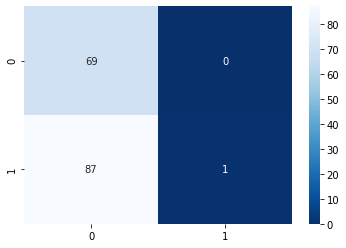

In [929]:
def evaluation_of_model(threshold):

    proba = clf.predict_proba(X_test)[:, 1]

    prediction = np.where(proba >= threshold, 1, 0)

    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

    print('Predictions:', prediction)
    
    accuracy = accuracy_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    
    print('Accuracy:', accuracy)
    print('Recall:', recall)

evaluation_of_model(0.85)

In [930]:
columns_to_drop = ['СПО (Сахаро-протеиновое соотношение)', 'Удой (prediction)']

cat_col_names = ['Возраст', 'Порода', 'Тип пастбища', 'Порода папы быка', 'СПО', 'Имя Папы']

num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г', 'Жирность,%', 'Белок,%']

In [931]:
cow_buy_2 = cow_buy_copy.copy()

In [932]:
cow_buy_copy = cow_buy_copy.drop(columns_to_drop, axis=1)
cow_ohe = encoder.transform(cow_buy_copy[cat_col_names])

encoder_col_names = encoder.get_feature_names()
cow_scaled = scaler.transform(cow_buy_copy[num_col_names])

cow_ohe = pd.DataFrame(cow_ohe, columns=encoder_col_names)
cow_scaled = pd.DataFrame(cow_scaled, columns=num_col_names)

cow_buy_copy = pd.concat([cow_ohe, cow_scaled], axis=1)

proba = clf.predict_proba(cow_buy_copy)[:, 1]

threshold = 0.65

predictions = np.where(proba >= threshold, 1, 0)

In [933]:
cow_buy_2['Вкус молока (prediction)'] = predictions

In [934]:
cow_buy_2[cow_buy_2['Вкус молока (prediction)'] == 1]

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Возраст,СПО,ЭКЕ в квадрате,Имя Папы,Удой (prediction),Вкус молока (prediction)
0,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,менее_2_лет,>_0.91,233.792365,Геркулес,6368.490286,1
7,15.513273,2024.190000,0.962023,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.079,менее_2_лет,>_0.91,240.661631,Буйный,6551.704658,1
11,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Соверин,3.42,3.075,менее_2_лет,>_0.91,233.792365,Барин,6078.594440,1
13,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.079,менее_2_лет,>_0.91,233.792365,Соловчик,6103.278849,1


In [935]:
processed_data = (cow_buy_2[(cow_buy_2['Удой (prediction)'] >= 6000) & (cow_buy_2['Вкус молока (prediction)'] == 1)])

In [936]:
processed_data

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,"Жирность,%","Белок,%",Возраст,СПО,ЭКЕ в квадрате,Имя Папы,Удой (prediction),Вкус молока (prediction)
0,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,менее_2_лет,>_0.91,233.792365,Геркулес,6368.490286,1
7,15.513273,2024.190000,0.962023,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.079,менее_2_лет,>_0.91,240.661631,Буйный,6551.704658,1
11,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Соверин,3.42,3.075,менее_2_лет,>_0.91,233.792365,Барин,6078.594440,1
13,15.290270,2038.787838,0.959274,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.079,менее_2_лет,>_0.91,233.792365,Соловчик,6103.278849,1


**Общий вывод:**
Были обработаны и загружены три файла. 
Убраны дубликаты, переименованы столбцы по правилу
Удален выброс (значение около 45.000 в признаке Удой).

Что показал исследовательский анализ данных:

Среднее значения удоя - 6125.9
Порода, которой больше - Вис Бик Айдиал
Более распространненое пастбище - холмистая местность
Порода папы быка, которой больше не выяылена - почти одинаково
Вкусное молоко встречается чаще чем невкусного
Возраст - силно чаще старше двух лет
Барин -  самое распростаннное имя папы быка

Между белком, жирностью и удоем не наблюдается сильной корреляции и линейной зависимости. 
Между сырым протеином и удоем прослеживается линейная зависимость, хоть и не очень сильная. Между сырым протеином и удоем корреляцияне такая сильная - 0.44,
Между СПО и удоем нет линейной связи, а уровень корреляции сильный 0.79
Между ЭКЕ и удоем нет линейной зависимости, на графике прослеживается парабола. Уровень корреляции сильный 0.77

Линейная регрессия

Создана модель, прогнозирующая удой коров на основе признаков корма, типа пастбища и личных параметров коров. Из трех моделей была выбрана самая лучшая со следующими метриками:

Логистическая регрессия

Созздана модель, прогнозирующая вкус молока на основе признаков корма, типа пастбища, личных параметров коров и содержании белка и жиров в молоке.